####  Importing necessary libraries 

In [14]:
import pandas as pd
import numpy as np
from easygui import fileopenbox
import matplotlib.pyplot as plt
import kmodes.kprototypes 
from kmodes.kprototypes import k_prototypes
from kmodes.kprototypes import KPrototypes
pd.set_option('display.max_rows',1000)

In [15]:
df_imp=pd.read_csv(fileopenbox())


In [16]:
df_imp

,Client.Category,Solution.Type,Deal.Date,Sector,Location,VP.Name,Manager.Name,Deal.Cost,Deal.Status.Code
0,Telecom,Solution 7,27-Mar-12,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,25-Sep-12,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,01-Aug-11,Sector 20,Others,Ekta Zutshi,RussellÂ Dahlen,60000.00,Lost
3,Internal,Solution 59,28-Apr-11,Sector 20,Others,Ekta Zutshi,RussellÂ Dahlen,60000.00,Lost
4,Internal,Solution 32,03-Jun-11,Sector 20,Others,Ekta Zutshi,RussellÂ Dahlen,80882.35,Lost
...,...,...,...,...,...,...,...,...,...
10056,Power ind,Solution 9,18-Mar-19,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,Lost
10057,Internal,Solution 6,04-Mar-19,Sector 20,Others,Rudraksh Sharma,Sharavan Singh,777058.82,Won
10058,Power ind,Solution 9,28-Feb-19,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,Lost
10059,Power ind,Solution 62,27-Jan-19,Sector 9,L5,ManÂ Suddeth,CleotildeÂ Biron,3042058.82,Won


In [17]:
df_imp.dtypes

Client.Category      object
Solution.Type        object
Deal.Date            object
Sector               object
Location             object
VP.Name              object
Manager.Name         object
Deal.Cost           float64
Deal.Status.Code     object
dtype: object

#### Spliting Independent and dependent variables 

In [18]:
x=df_imp.iloc[:,:-1]
y=df_imp.iloc[:,-1]

In [19]:
x=x.drop(['Deal.Date'],axis=1)

#### Creating Dummies for Independent variable

In [20]:
x1=pd.get_dummies(x['Client.Category'])
x2=pd.get_dummies(x['Solution.Type'])
x3=pd.get_dummies(x['Location'])
x4=pd.get_dummies(x['Sector'])
x5=pd.get_dummies(x['VP.Name'])
x6=pd.get_dummies(x['Manager.Name'])

In [21]:
x

,Client.Category,Solution.Type,Sector,Location,VP.Name,Manager.Name,Deal.Cost
0,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00
1,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88
2,Internal,Solution 59,Sector 20,Others,Ekta Zutshi,RussellÂ Dahlen,60000.00
3,Internal,Solution 59,Sector 20,Others,Ekta Zutshi,RussellÂ Dahlen,60000.00
4,Internal,Solution 32,Sector 20,Others,Ekta Zutshi,RussellÂ Dahlen,80882.35
...,...,...,...,...,...,...,...
10056,Power ind,Solution 9,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29
10057,Internal,Solution 6,Sector 20,Others,Rudraksh Sharma,Sharavan Singh,777058.82
10058,Power ind,Solution 9,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29
10059,Power ind,Solution 62,Sector 9,L5,ManÂ Suddeth,CleotildeÂ Biron,3042058.82


In [22]:
x_dummy=pd.concat([x,x1,x2,x3,x4,x5,x6],axis=1)

In [23]:
x_dummy.columns

Index(['Client.Category', 'Solution.Type', 'Sector', 'Location', 'VP.Name',
       'Manager.Name', 'Deal.Cost', 'Airpline', 'Automobiles', 'Consulting',
       ...
       'shafibul', 'sharat chandran', 'sheak shakir', 'shiv kumar',
       'shiv shakti singh', 'shyam kumar', 'som dutt', 'sunder paal',
       'vansu dev', 'vinit katariya'],
      dtype='object', length=474)

In [24]:
x_dummy.dtypes

Client.Category              object
Solution.Type                object
Sector                       object
Location                     object
VP.Name                      object
Manager.Name                 object
Deal.Cost                   float64
Airpline                      uint8
Automobiles                   uint8
Consulting                    uint8
Consumer Good                 uint8
Domestic Bank                 uint8
Domestic Private Bank         uint8
Domestic Public Bank          uint8
Electronics                   uint8
Energy                        uint8
Energy                        uint8
Finance                       uint8
Govt                          uint8
Govt Bank Special             uint8
Healthcare                    uint8
Holding                       uint8
Hospitality                   uint8
Industries                    uint8
Infrastructure                uint8
Insurance                     uint8
Internal                      uint8
International Bank          

In [25]:
x_dummy=x_dummy.drop(['Client.Category', 'Solution.Type', 'Sector', 'Location',
       'VP.Name', 'Manager.Name'],axis=1)

In [26]:
x_dummy

,Deal.Cost,Airpline,Automobiles,Consulting,Consumer Good,Domestic Bank,Domestic Private Bank,Domestic Public Bank,Electronics,Energy,...,shafibul,sharat chandran,sheak shakir,shiv kumar,shiv shakti singh,shyam kumar,som dutt,sunder paal,vansu dev,vinit katariya
0,150000.00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,744705.88,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,60000.00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,60000.00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,80882.35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10056,588235.29,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10057,777058.82,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10058,588235.29,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10059,3042058.82,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Creating Label encoder for Dependant Variable

In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [28]:
y_lab=le.fit_transform(y)

In [29]:
y_lab=pd.DataFrame(y_lab,index=y.index)

In [30]:
y_lab.columns=(['Deal Status Code'])

In [31]:
y_lab

,Deal Status Code
0,1
1,1
2,0
3,0
4,0
...,...
10056,0
10057,1
10058,0
10059,1


#### Creating Clusters using K-Prototypes

In [32]:
x_matrix=x.to_numpy()

In [33]:
x_matrix

array([['Telecom', 'Solution 7', 'Sector 24', ..., 'Ekta Zutshi',
        'Gopa Trilochana', 150000.0],
       ['Telecom', 'Solution 7', 'Sector 24', ..., 'Ekta Zutshi',
        'Gopa Trilochana', 744705.88],
       ['Internal', 'Solution 59', 'Sector 20', ..., 'Ekta Zutshi',
        'RussellÂ\xa0Dahlen', 60000.0],
       ...,
       ['Power ind', 'Solution 9', 'Sector 9', ..., 'Rudraksh Sharma',
        'Rudraksh Sharma', 588235.29],
       ['Power ind', 'Solution 62', 'Sector 9', ..., 'ManÂ\xa0Suddeth',
        'CleotildeÂ\xa0Biron', 3042058.82],
       ['Others', 'Solution 9', 'Sector 12', ..., 'SonÂ\xa0Mcconnaughy',
        'Tarun Garg', 147058.82]], dtype=object)

### To calculate optimum Cluster numbers using elbow method

In [34]:
for col in list(x.select_dtypes('object').columns):
    catColumnsPos = [x.columns.get_loc(col)]
    print('Categorical columns           : {}'.format(list(x.select_dtypes('object').columns)))
    print('Categorical columns position  : {}'.format(catColumnsPos))
    


Categorical columns           : ['Client.Category', 'Solution.Type', 'Sector', 'Location', 'VP.Name', 'Manager.Name']
Categorical columns position  : [0]
Categorical columns           : ['Client.Category', 'Solution.Type', 'Sector', 'Location', 'VP.Name', 'Manager.Name']
Categorical columns position  : [1]
Categorical columns           : ['Client.Category', 'Solution.Type', 'Sector', 'Location', 'VP.Name', 'Manager.Name']
Categorical columns position  : [2]
Categorical columns           : ['Client.Category', 'Solution.Type', 'Sector', 'Location', 'VP.Name', 'Manager.Name']
Categorical columns position  : [3]
Categorical columns           : ['Client.Category', 'Solution.Type', 'Sector', 'Location', 'VP.Name', 'Manager.Name']
Categorical columns position  : [4]
Categorical columns           : ['Client.Category', 'Solution.Type', 'Sector', 'Location', 'VP.Name', 'Manager.Name']
Categorical columns position  : [5]


In [35]:
import kmodes
from kmodes.kprototypes import KPrototypes

In [36]:
cost=[]
for i in range (1,10):
    kp=KPrototypes(n_clusters=i,init='Huang',n_init=5,verbose=1)
    clusterss=kp.fit_predict(x,categorical=[0,1,2,3,4,5])
    cost.append(kp.cost_)
    print('Categorical columns position  : {}'.format(catColumnsPos))


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 0, ncost: 2.6728973764753292e+16
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 0, ncost: 2.6728973764753292e+16
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 0, ncost: 2.6728973764753292e+16
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 0, ncost: 2.6728973764753292e+16
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/100, moves: 0, ncost: 2.6728973764753292e+16
Best run was number 1
Categorical columns position  : [5]
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 543, ncost: 1.4303331643239088e+16
Run: 1, iteration: 2/100, moves: 286, ncost: 1.2654463997963484e

In [37]:
pd.DataFrame({'clusterss':range(0,9),'cost':cost})

,clusterss,cost
0,0,2.672897e+16
1,1,1.147462e+16
2,2,5.976207e+15
3,3,3.550480e+15
4,4,2.168759e+15
5,5,1.523464e+15
6,6,1.272905e+15
7,7,1.166909e+15
8,8,7.421936e+14


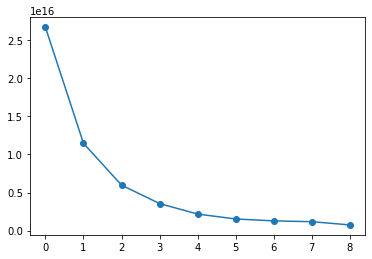

In [38]:
plt.plot(list(range(0,9)),cost,'-o')

In [39]:
kp_final=KPrototypes(n_clusters=2,init='Huang',n_init=5,verbose=1)
clusterss=kp_final.fit_predict(x,categorical=[0,1,2,3,4,5])

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 849, ncost: 1.4873952888800636e+16
Run: 1, iteration: 2/100, moves: 372, ncost: 1.301377502532314e+16
Run: 1, iteration: 3/100, moves: 132, ncost: 1.2297250750512616e+16
Run: 1, iteration: 4/100, moves: 59, ncost: 1.2030903201228706e+16
Run: 1, iteration: 5/100, moves: 29, ncost: 1.1903991795832472e+16
Run: 1, iteration: 6/100, moves: 47, ncost: 1.156127107555171e+16
Run: 1, iteration: 7/100, moves: 13, ncost: 1.1483637974556184e+16
Run: 1, iteration: 8/100, moves: 5, ncost: 1.1474619517132044e+16
Run: 1, iteration: 9/100, moves: 0, ncost: 1.1474619517132044e+16
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 468, ncost: 1.3958831844832514e+16
Run: 2, iteration: 2/100, moves: 240, ncost: 1.2488619627883076e+16
Run: 2, iteration: 3/100, moves: 65, ncost: 1

In [40]:
kp_final.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

In [41]:
df_imp_new=df_imp.copy()

In [42]:
df_imp_new['Cluster']=kp_final.labels_

In [44]:
df_imp_new[df_imp_new['Cluster']==0].sort_values(by='Deal.Cost',ascending=False)

,Client.Category,Solution.Type,Deal.Date,Sector,Location,VP.Name,Manager.Name,Deal.Cost,Deal.Status.Code,Cluster
5052,Internal,Solution 32,05-Jul-16,Sector 23,L1,Rahul Bajpai,mohd shakib,6443529.41,Won,0
3882,Consulting,Solution 32,25-Oct-15,Sector 23,L10,LongÂ Bergstrom,Md Irshad,6441176.47,Won,0
667,Others,Solution 32,19-Dec-12,Sector 23,L10,LongÂ Bergstrom,Chanchal sharma,6303529.41,Won,0
547,Others,Solution 59,19-Jul-12,Sector 23,L10,MervinÂ Harwood,Chanchal sharma,6303529.41,Lost,0
1427,International Bank,Solution 32,18-Nov-13,Sector 23,L10,LongÂ Bergstrom,AbramÂ Fines,6294117.65,Won,0
...,...,...,...,...,...,...,...,...,...,...
3415,Others,Solution 39,16-May-15,Sector 23,L5,Ekta Zutshi,Rahul Bajpai,1470.59,Lost,0
751,Internal,Solution 10,11-Oct-13,Sector 20,Others,Ankita Aggarwal,Subhangi Sood,882.35,Won,0
1123,Internal,Solution 28,17-Aug-13,Sector 20,Others,Ankita Aggarwal,DesmondÂ Krout,588.24,Won,0
45,Domestic Private Bank,Solution 7,06-May-15,Sector 2,L10,MervinÂ Harwood,D. Ankit,294.12,Lost,0


In [45]:
df_imp_new[df_imp_new['Cluster']==1].sort_values(by='Deal.Cost',ascending=False)

,Client.Category,Solution.Type,Deal.Date,Sector,Location,VP.Name,Manager.Name,Deal.Cost,Deal.Status.Code,Cluster
3788,Internal,Solution 11,22-Oct-18,Sector 20,Others,Varsha Arora,Rahul Singh,36764705.88,Won,1
4752,Insurance,Solution 67,30-May-16,Sector 16,L10,MervinÂ Harwood,ClintonÂ Mani,32352941.18,Lost,1
4770,Insurance,Solution 67,08-Mar-16,Sector 16,L10,MervinÂ Harwood,ClintonÂ Mani,32352941.18,Lost,1
3799,Internal,Solution 11,27-Nov-18,Sector 20,Others,Varsha Arora,Rahul Singh,29411764.71,Won,1
3132,Internal,Solution 10,03-Nov-18,Sector 24,Others,SonÂ Mcconnaughy,Eesha Yadav,27941176.47,Lost,1
3136,Internal,Solution 10,10-Oct-18,Sector 24,Others,SonÂ Mcconnaughy,Eesha Yadav,27941176.47,Lost,1
3694,Internal,Solution 11,01-Jul-18,Sector 20,Others,Varsha Arora,Sarwan Singh,26352941.18,Won,1
386,Insurance,Solution 7,03-Jun-18,Sector 16,L10,SonÂ Mcconnaughy,RosanaÂ Yokum,25882352.94,Lost,1
407,Insurance,Solution 7,11-Jul-18,Sector 16,L10,SonÂ Mcconnaughy,RosanaÂ Yokum,25882352.94,Lost,1
7250,Internal,Solution 30,20-Sep-17,Sector 20,Others,Mangesh K. Singh,Vinay Kumar,25000000.00,Won,1


In [46]:
df_imp_new['Deal.Status.Code']=le.fit_transform(df_imp_new['Deal.Status.Code'])

In [47]:
df_imp_new

,Client.Category,Solution.Type,Deal.Date,Sector,Location,VP.Name,Manager.Name,Deal.Cost,Deal.Status.Code,Cluster
0,Telecom,Solution 7,27-Mar-12,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,1,0
1,Telecom,Solution 7,25-Sep-12,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,1,0
2,Internal,Solution 59,01-Aug-11,Sector 20,Others,Ekta Zutshi,RussellÂ Dahlen,60000.00,0,0
3,Internal,Solution 59,28-Apr-11,Sector 20,Others,Ekta Zutshi,RussellÂ Dahlen,60000.00,0,0
4,Internal,Solution 32,03-Jun-11,Sector 20,Others,Ekta Zutshi,RussellÂ Dahlen,80882.35,0,0
...,...,...,...,...,...,...,...,...,...,...
10056,Power ind,Solution 9,18-Mar-19,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,0,0
10057,Internal,Solution 6,04-Mar-19,Sector 20,Others,Rudraksh Sharma,Sharavan Singh,777058.82,1,0
10058,Power ind,Solution 9,28-Feb-19,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,0,0
10059,Power ind,Solution 62,27-Jan-19,Sector 9,L5,ManÂ Suddeth,CleotildeÂ Biron,3042058.82,1,0


In [48]:
df_imp_new.groupby(['Deal.Cost','Cluster']).mean()

,,Deal.Status.Code
Deal.Cost,Cluster,
294.12,0,0.000000
588.24,0,1.000000
882.35,0,1.000000
1470.59,0,0.011976
2941.18,0,0.000000
...,...,...
26352941.18,1,1.000000
27941176.47,1,0.000000
29411764.71,1,1.000000


In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
con  = confusion_matrix(df_imp_new['Deal.Status.Code'], df_imp_new['Cluster'])

In [51]:
accuracy  = np.diagonal(con).sum()/con.sum()
print(accuracy)

0.6242918198986185


#### Creating clusters with matrix of independent variables.

In [52]:
for cols in list(x.select_dtypes('object').columns):
    cateColumnsPos = [x.columns.get_loc(cols)]
    print('Categorical columns           : {}'.format(list(x.select_dtypes('object').columns)))
    print('Categorical columns position  : {}'.format(cateColumnsPos))
    

Categorical columns           : ['Client.Category', 'Solution.Type', 'Sector', 'Location', 'VP.Name', 'Manager.Name']
Categorical columns position  : [0]
Categorical columns           : ['Client.Category', 'Solution.Type', 'Sector', 'Location', 'VP.Name', 'Manager.Name']
Categorical columns position  : [1]
Categorical columns           : ['Client.Category', 'Solution.Type', 'Sector', 'Location', 'VP.Name', 'Manager.Name']
Categorical columns position  : [2]
Categorical columns           : ['Client.Category', 'Solution.Type', 'Sector', 'Location', 'VP.Name', 'Manager.Name']
Categorical columns position  : [3]
Categorical columns           : ['Client.Category', 'Solution.Type', 'Sector', 'Location', 'VP.Name', 'Manager.Name']
Categorical columns position  : [4]
Categorical columns           : ['Client.Category', 'Solution.Type', 'Sector', 'Location', 'VP.Name', 'Manager.Name']
Categorical columns position  : [5]


In [53]:
kp_final_new=KPrototypes(n_clusters=2,init='Cao',n_init=5,verbose=1)
clusterss=kp_final_new.fit_predict(x_matrix,categorical=[0,1,2,3,4,5])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 1897, ncost: 1.6752379772273462e+16
Run: 1, iteration: 2/100, moves: 728, ncost: 1.4297079865887758e+16
Run: 1, iteration: 3/100, moves: 289, ncost: 1.2603731670086764e+16
Run: 1, iteration: 4/100, moves: 78, ncost: 1.2244630163668058e+16
Run: 1, iteration: 5/100, moves: 57, ncost: 1.199490594752422e+16
Run: 1, iteration: 6/100, moves: 35, ncost: 1.18004393900289e+16
Run: 1, iteration: 7/100, moves: 35, ncost: 1.1533643372843596e+16
Run: 1, iteration: 8/100, moves: 14, ncost: 1.147461951713205e+16
Run: 1, iteration: 9/100, moves: 0, ncost: 1.147461951713205e+16
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 1061, ncost: 1.5261894870988886e+16
Run: 2, iteration: 2/100, moves: 430, ncost: 1.3344098866231328e+16
Run: 2, iteration: 3/100, moves: 176, ncost: 

In [54]:
df_new_1=df_imp.copy()

In [55]:
df_new_1['Clusters']=kp_final_new.labels_

In [56]:
df_new_1['Deal.Status.Code']=le.fit_transform(df_new_1['Deal.Status.Code'])

In [57]:
con_new  = confusion_matrix(df_new_1['Deal.Status.Code'], df_new_1['Clusters'])

In [58]:
accuracy  = np.diagonal(con_new).sum()/con_new.sum()
print(accuracy)

0.6242918198986185
